# Import Packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

#### Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts, retrieved from [Kaggle](https://www.kaggle.com/captainozlem/framingham-chd-preprocessed-data)

Variables:
- Gender (__male__): male or female (Categorical: 0 = Female, 1 = Male)
- __age__: Age of the patient - (Continuous)
- __education__: level of education (Categorical: 0 = High School degree or less, 1 = College Degree and Higher)
- __currentSmoker__: whether or not the patient is a current smoker (Categorical: 0 = Nonsmoker, 1 = Smoker)
- __cigsPerDay__: the number of cigarettes that the person smoked on average in one day (Continuous)
- __BPMeds__: whether or not the patient was on blood pressure medication (Categorical: 0 = No, 1 = Yes)
- __prevalentStroke__: whether or not the patient had previously had a stroke (Categorical: 0 = No, 1 = Yes)
- __prevalentHyp__: whether or not the patient was hypertensive (Categorical: 0 = No, 1 = Yes)
- __diabetes__: whether or not the patient had diabetes (Categorical: 0 = No, 1 = Yes)
- __totChol__: total cholesterol level (Continuous)
- __sysBP__: systolic blood pressure (Continuous)
- __diaBP__: diastolic blood pressure (Continuous)
- __BMI__: Body Mass Index (Continuous)
- __heartRate__: heart rate (Continuous)
- __glucose__: glucose level (Continuous)

Predict variable (desired target)
- __TenYearCHD__: 10 year risk of coronary heart disease CHD (Categorical: 1 = Yes, 0 = No)

In [8]:
kgheart = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Data/CHD_preprocessed.csv')
kgheart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
gheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


# Data Exploration

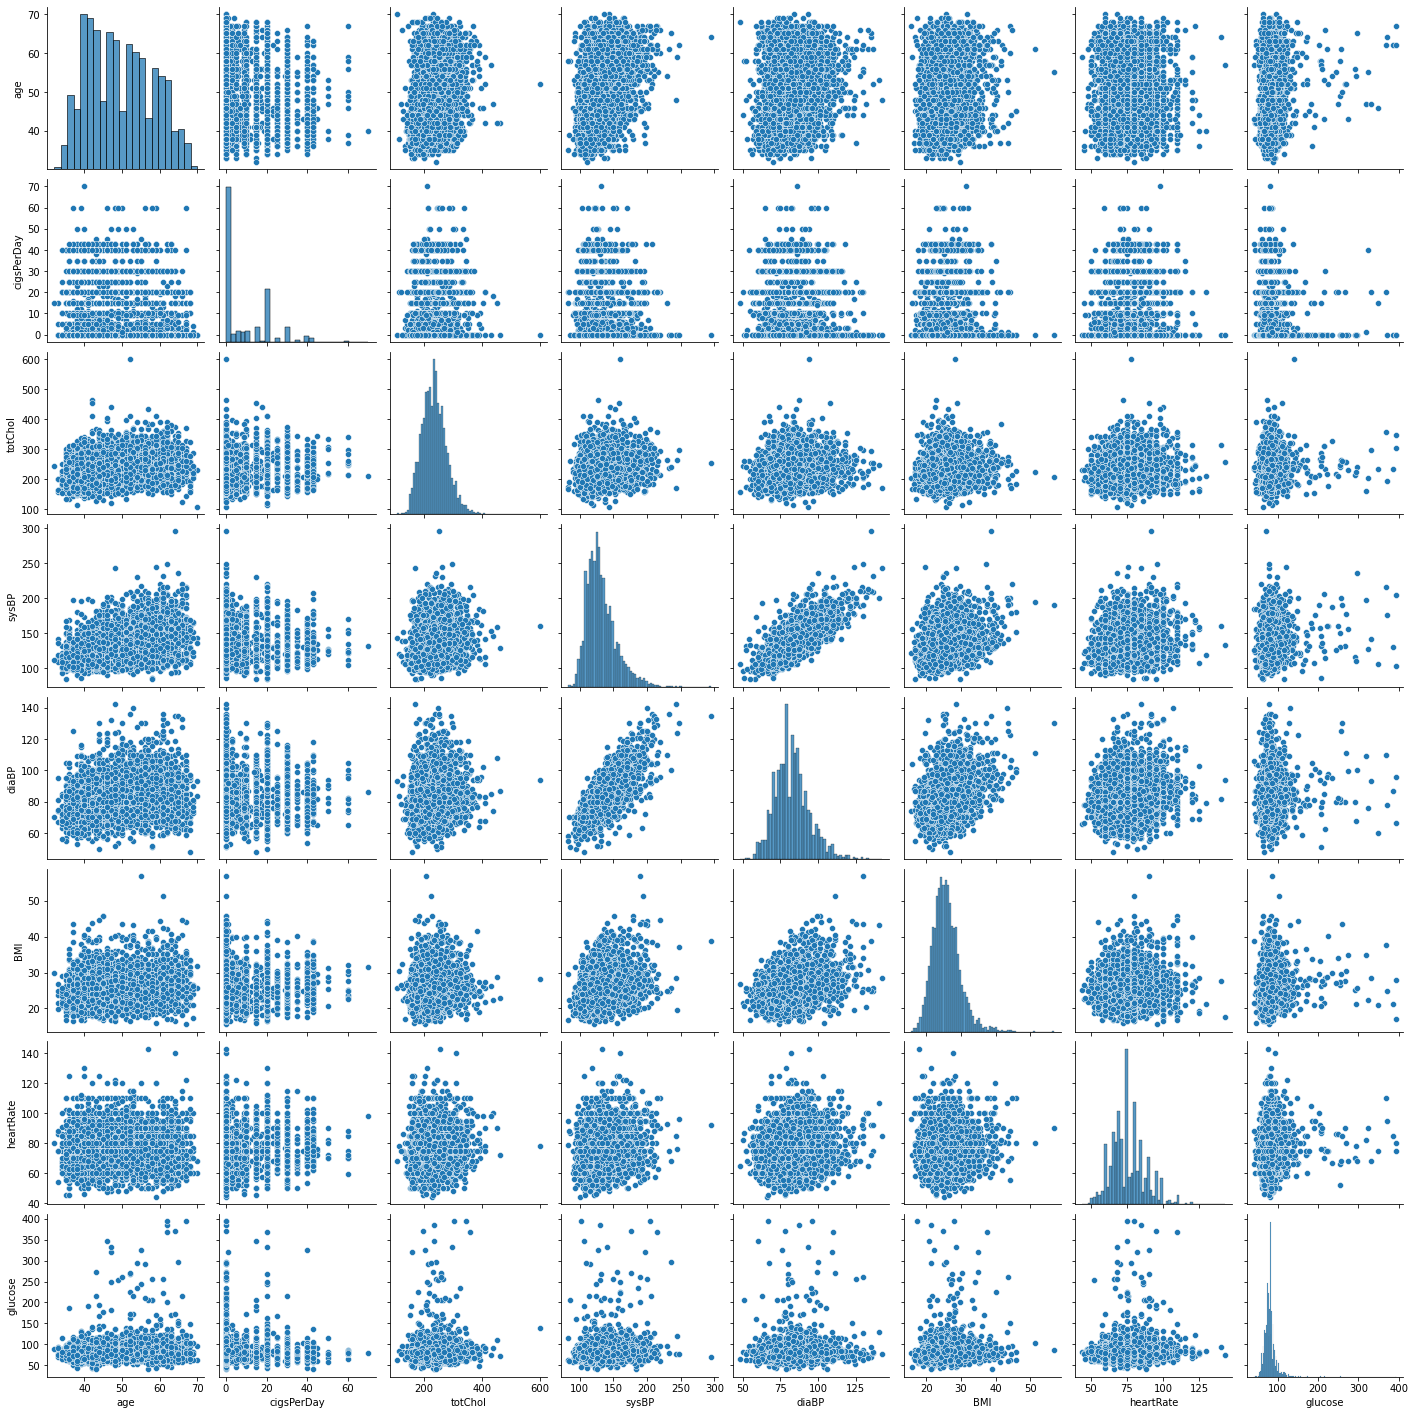

In [9]:
sns.pairplot(kgheart, vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

<AxesSubplot:>

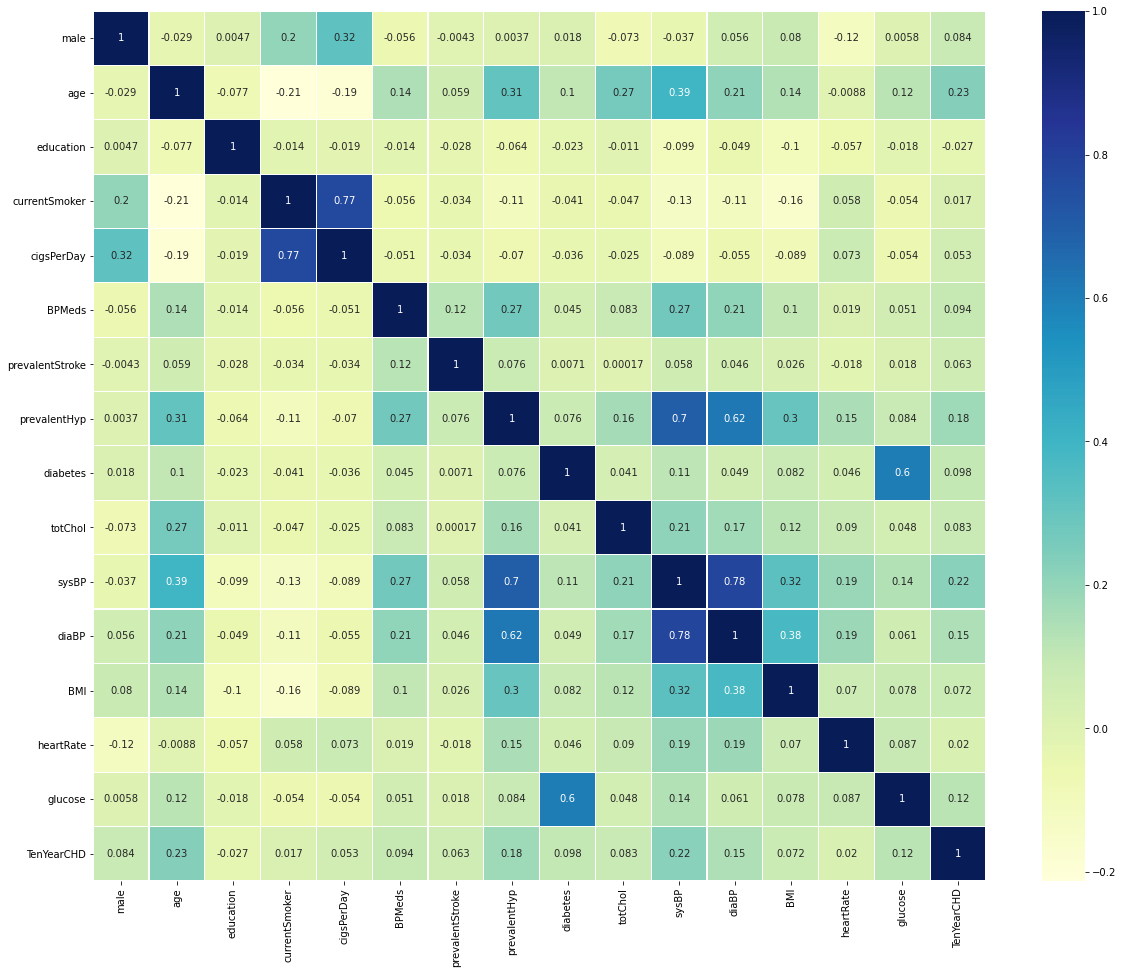

In [12]:
plt.figure(figsize=(20,16))
sns.heatmap(kgheart.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

<Figure size 1440x1152 with 0 Axes>

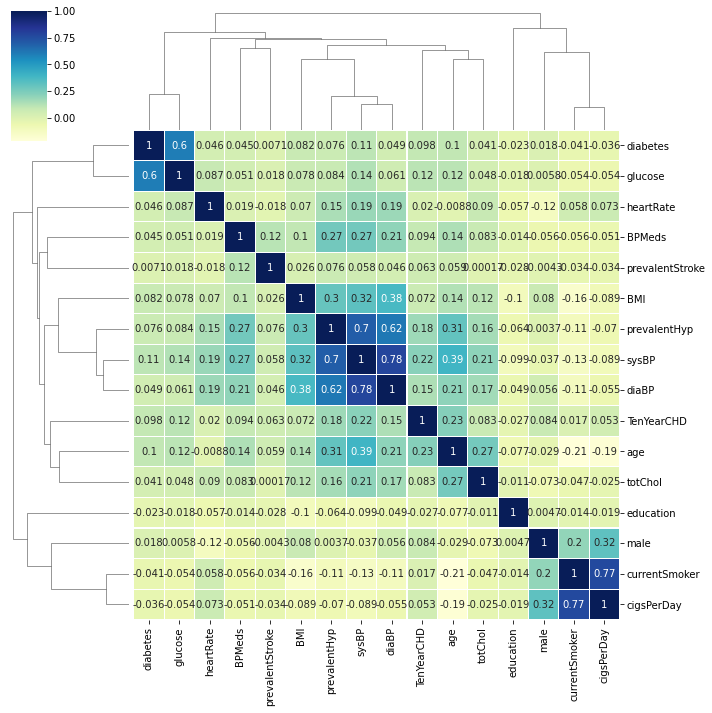

In [13]:
plt.figure(figsize=(20,16))
sns.clustermap(kgheart.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

/Users/silviacatalina/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1440x1152 with 0 Axes>

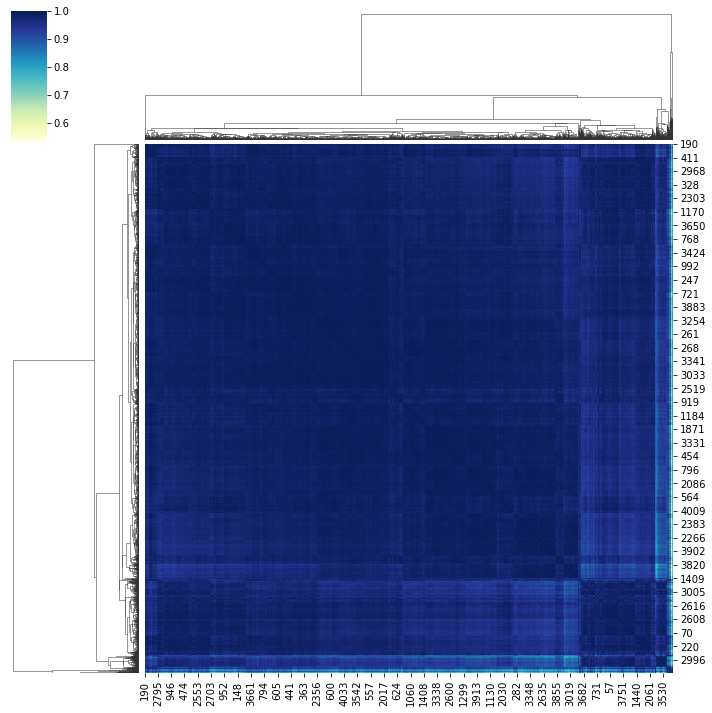

In [14]:
plt.figure(figsize=(20,16))
sns.clustermap(kgheart.T.corr(), cmap ="YlGnBu")

# Bar Charts (Categorical Variables)

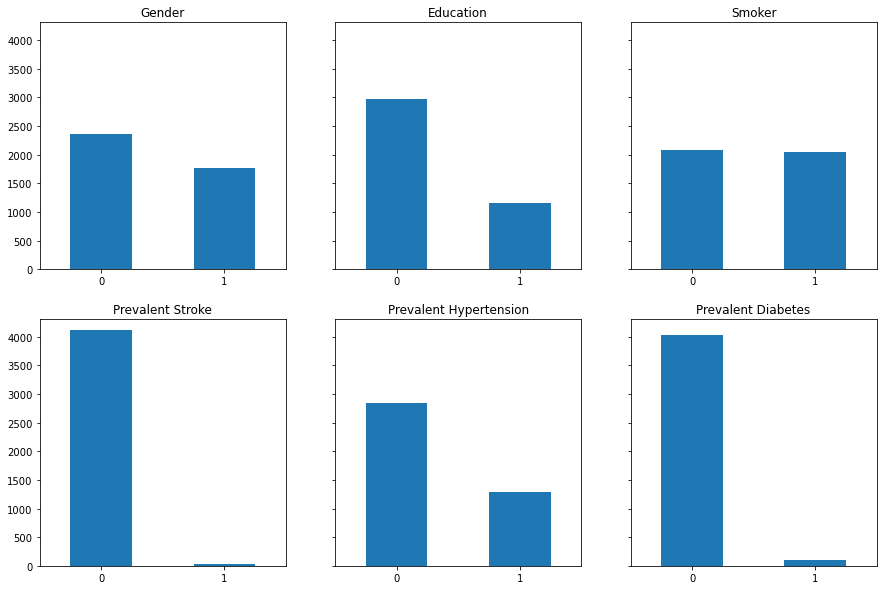

In [5]:
fig, axes = plt.subplots(2, 3, figsize = (15,10), sharey = True)
kgheart.male.value_counts().plot.bar(title = 'Gender', ax=axes[0,0])
kgheart.education.value_counts().plot.bar(title ='Education', ax=axes[0,1])
kgheart.currentSmoker.value_counts().plot.bar(title = 'Smoker', ax=axes[0,2])
kgheart.prevalentStroke.value_counts().plot.bar(title = 'Prevalent Stroke', ax=axes[1,0])
kgheart.prevalentHyp.value_counts().plot.bar(title = 'Prevalent Hypertension', ax=axes[1,1])
kgheart.diabetes.value_counts().plot.bar(title = 'Prevalent Diabetes', ax=axes[1,2])
for ax in fig.axes:
    ax.tick_params(labelrotation=0)

# Histograms (Continuous Variables)

## Systolic and Diastolic Blood Pressure (BP)
* Red vertical lines represent the thresholds for a dignosis of __stage 1 hypertension__, i.e. hypertension is diagnosed when an individual has a diastolic blood pressure of 90 or higher __or__ a systolic blood pressure of 130 or higher

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

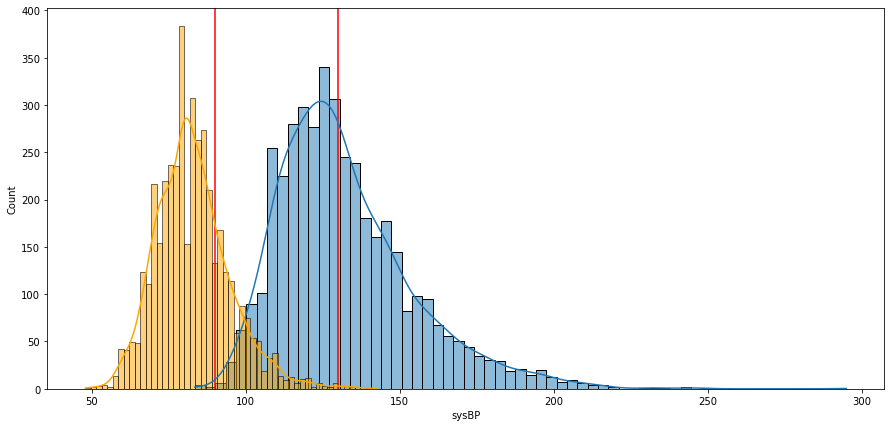

In [11]:
plt.figure(figsize = (15, 7))
plt.axvline(90, color ='red')
plt.axvline(130, color = 'red')
sns.histplot(kgheart.sysBP, kde = True)
sns.histplot(kgheart.diaBP, kde = True, color ='orange')

## Risk of Heart Disease by systolic BP

<AxesSubplot:xlabel='sysBP', ylabel='Count'>

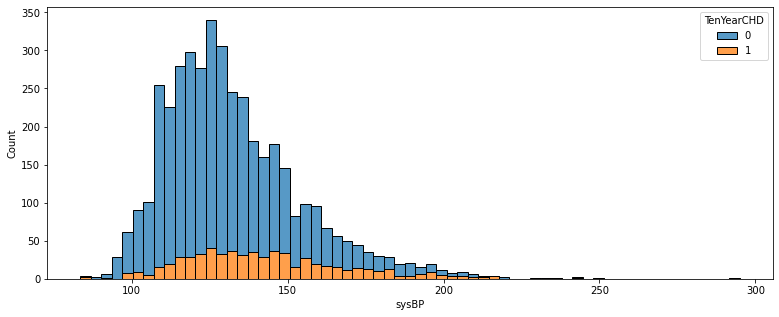

In [7]:
plt.figure(figsize = (13, 5))
sns.histplot(data = kgheart, x = 'sysBP', hue='TenYearCHD', multiple= 'stack')

__*People with risk for heart disease are evenly spread across the systolic BP readings*__

## Systolic BP separated by gender and contrasted with smoking status

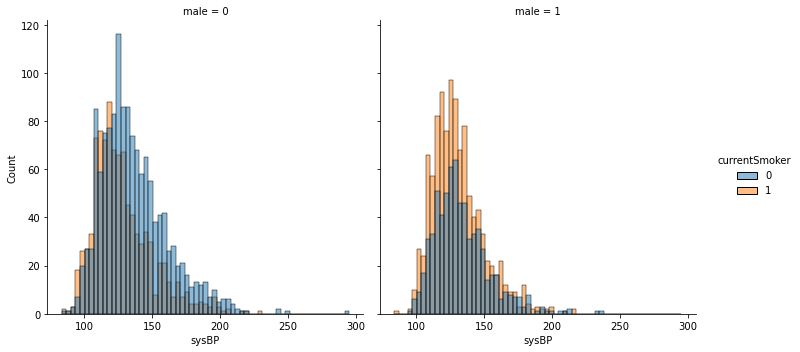

In [8]:
sns.displot(kgheart, x='sysBP', hue = 'currentSmoker', col = 'male', kind='hist')

__*More males are current smokers than females*__

<AxesSubplot:xlabel='glucose', ylabel='Count'>

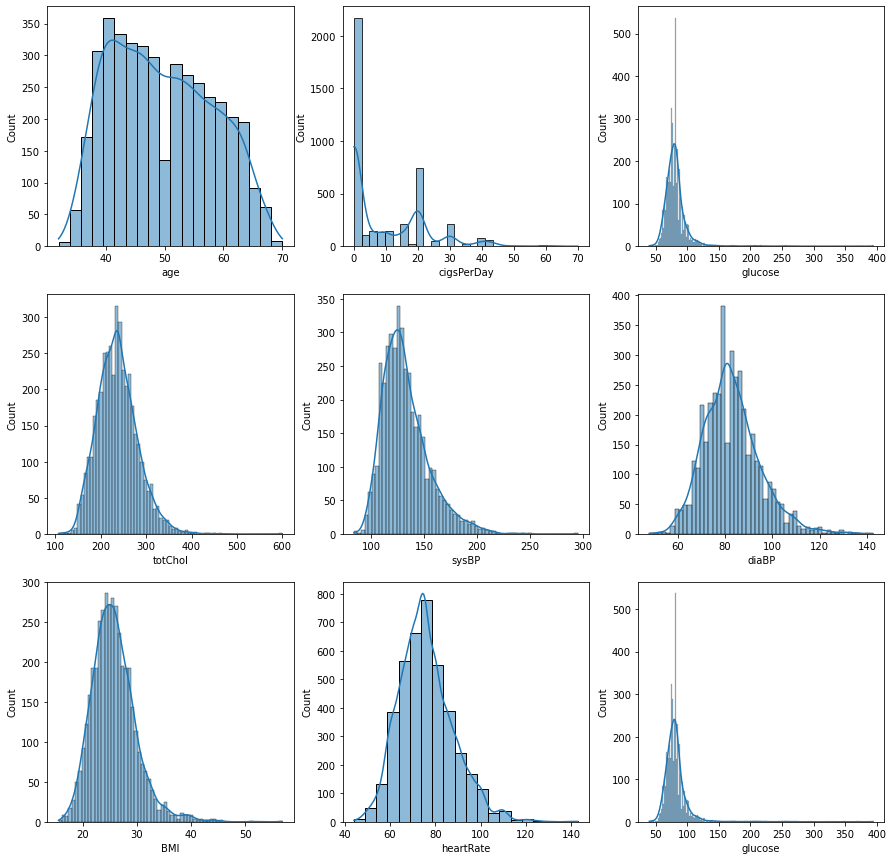

In [9]:
fig, axes = plt.subplots(3,3, figsize = (15,15), sharey = False)
sns.histplot(kgheart.age, bins=20, kde = True, ax=axes[0,0])
sns.histplot(kgheart.cigsPerDay, kde = True, ax=axes[0,1])
sns.histplot(kgheart.glucose,kde = True, ax=axes[0,2])
sns.histplot(kgheart.totChol, kde = True, ax=axes[1,0])
sns.histplot(kgheart.sysBP, kde = True, ax=axes[1,1])
sns.histplot(kgheart.diaBP, kde = True, ax=axes[1,2])
sns.histplot(kgheart.BMI, kde = True, ax=axes[2,0])
sns.histplot(kgheart.heartRate, bins = 20, kde = True, ax=axes[2,1])
sns.histplot(kgheart.glucose, kde = True, ax=axes[2,2])

# k-Means Clustering

* k-Means clustering is an unsupervised machine learning that separates data into groups that are similar

## Import Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

## Data Wrangling
* KMeans does not accept string data, but this dataset is fully numeric
* Subsetting to continuous variables and the predicted variable

In [11]:
kgheartTrimmed = kgheart[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']].copy()

In [12]:
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Perform k-Means Clustering

### Testing 2 clusters

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(kgheartTrimmed)

KMeans(n_clusters=2)

In [14]:
kgheartTrimmed['Group'] = kmeans.labels_
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Group
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,1
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,0


### Investigate Means by Category

In [15]:
kgheartTrimmed.groupby('Group').mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Group,,,,,,,,,
0,52.254147,8.660545,277.744076,139.264514,85.928614,26.365476,77.475118,83.043839,0.188981
1,47.695297,9.406135,208.303476,127.605112,80.762168,25.373379,74.855215,81.188957,0.126380


### Testing 3 Clusters

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(kgheartTrimmed)

KMeans(n_clusters=3)

In [17]:
kgheartTrimmed['Group'] = kmeans.labels_
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Group
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,1
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,1
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,2


### Investigate Means by Category

In [18]:
kgheartTrimmed.groupby('Group').mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Group,,,,,,,,,
0,46.247319,9.586461,193.636059,124.549933,79.216488,24.949967,74.405496,79.469169,0.111930
1,50.901992,9.081237,244.211740,135.199161,84.361897,26.146050,76.646751,83.262055,0.165094
2,52.793997,8.167804,304.601637,140.906548,86.435880,26.508620,77.140518,83.564802,0.199181


__*The 3 clusters do not seem to differ much from each other*__

### Testing 4 Clusters

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(kgheartTrimmed)

KMeans(n_clusters=4)

In [20]:
kgheartTrimmed['Group'] = kmeans.labels_
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Group
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,1
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,3
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,3
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,3
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,0


### Investigate Means by Category

In [21]:
kgheartTrimmed.groupby('Group').mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Group,,,,,,,,,
0,52.750000,8.144444,304.681944,140.567361,86.376389,26.499831,77.116667,81.302778,0.194444
1,46.257162,9.609594,193.835443,124.550633,79.229847,24.942586,74.442372,79.399734,0.112592
2,54.564103,6.307692,247.410256,153.551282,88.512821,28.039963,80.538462,258.871795,0.538462
3,50.870262,9.120662,244.616658,135.037640,84.326749,26.124173,76.559530,80.550988,0.159103


* __*The group with the highest percentage of TenYearCHD risk (54%) has the highest average blood sugar, indicative of unmanaged diabetes, the highest average BMI, the highest avverage systolic blood pressure.*__
* __*The group with 2nd highest percentage of TenYearCHD risk (19%) has a high systolic blood pressure and the highest average total cholesterol.*__
* __*The group with the 3rd highest percentage (16%) of TenYearCHD risk has an average total cholesterol similar to the group with the highest risk, but a lower average systolic blood pressure and much lower blood sugar*__

### Testing 5 Clusters

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(kgheartTrimmed)

KMeans(n_clusters=5)

In [33]:
kgheartTrimmed['Group'] = kmeans.labels_
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Group
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,2
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,4
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,1


### Investigate Means by Category

In [34]:
kgheartTrimmed.groupby('Group').mean()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Group,,,,,,,,,
0,48.995921,9.779062,243.789259,123.158736,78.883753,25.396779,75.006798,79.644460,0.120326
1,52.700557,8.077994,304.479109,139.254875,85.898329,26.427073,77.317549,81.118384,0.179666
2,45.697819,9.731308,190.805296,122.706776,78.330607,24.833000,74.376168,79.341121,0.101246
3,54.675676,6.378378,248.675676,154.513514,88.864865,28.154015,81.297297,263.540541,0.540541
4,54.910112,7.545746,235.487961,164.765650,97.806581,27.740392,79.362761,82.921348,0.276083


__*Adding a 5th cluster did not create a new group with a significant difference*__

## Run kNN Algorithm

* Unsupervised machine learning algorithm that looks at all the data points around the neighbors and decides whether data should be classified into one type or another based on the closest data points
* The higher the k the more bias you introduce. The results will be much cleaner, but you will falsely categorize more data points


## Additional Packages

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Group
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,2
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,4
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0,1


In [37]:
kgheartTrimmed.drop('Group', axis = 1, inplace = True)
kgheartTrimmed.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Scale Data

In [54]:
scaler = StandardScaler()
scaler.fit(kgheartTrimmed.drop('TenYearCHD',axis=1))
scaledVariables = scaler.transform(kgheartTrimmed.drop('TenYearCHD',axis=1))
scaledVariables[1]
kgheartScaled = pd.DataFrame(scaledVariables, columns=kgheartTrimmed.columns[:-1]) # leaves out predictor variable
kgheartScaled

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.233235,-0.763751,-0.948992,-1.194286,-1.077067,0.292457,0.338218,-0.216401
1,-0.415535,-0.763751,0.303745,-0.514866,-0.156658,0.724478,1.583266,-0.260149
2,-0.181906,0.914524,0.189860,-0.220451,-0.240331,-0.107655,-0.076798,-0.522637
3,1.336681,1.753661,-0.265681,0.798679,1.014772,0.687658,-0.906829,0.921047
4,-0.415535,1.166265,1.100941,-0.107215,0.094363,-0.657501,0.753234,0.133583
...,...,...,...,...,...,...,...,...
4128,0.051723,-0.679837,1.738698,2.112224,0.763751,0.046989,-0.823826,0.177331
4129,0.168537,2.844540,-0.675667,-0.265746,-0.240331,-1.489634,-0.906829,-0.610133
4130,-0.181906,0.914524,0.258191,-0.061920,-0.909720,-0.927515,0.670231,0.177331
4131,-0.649163,0.494955,-0.607336,-0.265746,0.345384,-1.624641,0.836238,0.002339


## Train Test Split

In [58]:
x = kgheartScaled
y = kgheartTrimmed['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## kNN Analysis

In [59]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [60]:
print(confusion_matrix(y_test, pred))

[[903 130]
 [167  40]]


In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.24      0.19      0.21       207

    accuracy                           0.76      1240
   macro avg       0.54      0.53      0.54      1240
weighted avg       0.74      0.76      0.75      1240



## Choose the Best Model

In [66]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))
    
min(errorRate)

0.16451612903225807

In [67]:
errorRate.index(min(errorRate))

19

Text(0, 0.5, 'Error Rate')

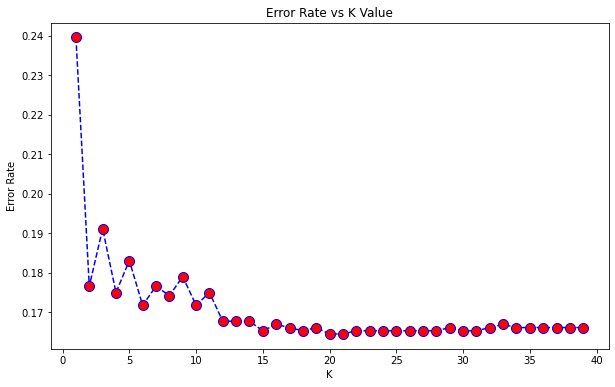

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Run the Final Model

In [68]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [69]:
print(confusion_matrix(y_test, pred))

[[1030    3]
 [ 203    4]]


In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1033
           1       0.57      0.02      0.04       207

    accuracy                           0.83      1240
   macro avg       0.70      0.51      0.47      1240
weighted avg       0.79      0.83      0.76      1240



__*The overall accuracy for this model is 79%*__

# Random Forests 

## Additional packages 

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
kgheart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Train Test Split

In [74]:
x = kgheart.drop('TenYearCHD', axis = 1)
y = kgheart['TenYearCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [75]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [76]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1046   13]
 [ 166   15]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1059
           1       0.54      0.08      0.14       181

    accuracy                           0.86      1240
   macro avg       0.70      0.54      0.53      1240
weighted avg       0.82      0.86      0.81      1240



__*The model is has an accuracy of 82%*__

# Hyperparameter Tuning

## Additional Packages

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [78]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7540322580645161
4 : 0.8387096774193549
5 : 0.8209677419354838
8 : 0.8483870967741935
10 : 0.8508064516129032
20 : 0.8475806451612903
50 : 0.8524193548387097
75 : 0.85
100 : 0.8540322580645161
250 : 0.8548387096774194
500 : 0.8556451612903225


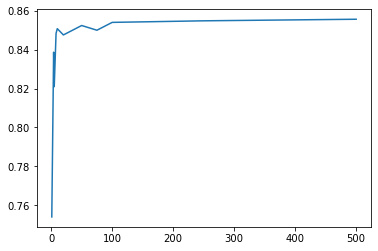

In [79]:
plt.plot(n_estimators_array, results)

In [80]:
max(results)

0.8556451612903225

In [81]:
n_est = n_estimators_array[results.index(max(results))]
n_est

500

__*The optimal number of estimators is 500*__

## Tuning the Remaing Tree Parameters

In [82]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [83]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [84]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40}

## Tuned Random Forest

In [86]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=500)

In [87]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1054    5]
 [ 171   10]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1059
           1       0.67      0.06      0.10       181

    accuracy                           0.86      1240
   macro avg       0.76      0.53      0.51      1240
weighted avg       0.83      0.86      0.80      1240



__*The tunned model has a 83% overall accuracy*__

## Feature Importance

In [89]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

male               0.026056
age                0.157243
education          0.011561
currentSmoker      0.011191
cigsPerDay         0.049283
BPMeds             0.007838
prevalentStroke    0.003055
prevalentHyp       0.021915
diabetes           0.004761
totChol            0.111554
sysBP              0.155516
diaBP              0.117918
BMI                0.120902
heartRate          0.089908
glucose            0.111297
dtype: float64

In [15]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

NameError: name 'feature_importances' is not defined

<AxesSubplot:>

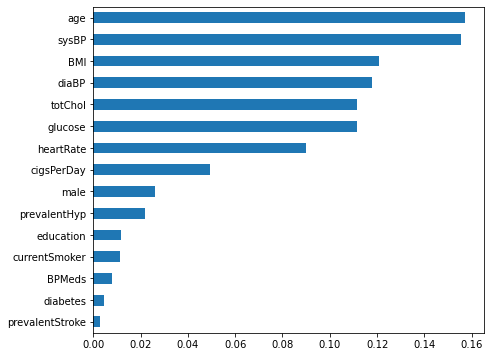

In [94]:
feature_importances.plot(kind='barh', figsize=(7,6))